In [2]:
import numpy as np
np.random.seed(0)
import mltools as ml
import matplotlib.pyplot as plt # use matplotlib for plotting with inline plot
%matplotlib inline

### Loading Data

In [3]:
X = np.genfromtxt("C:\\Users\\regin\\Desktop\\CS 178\\Project\\X_train.txt", delimiter = None)
Y = np.genfromtxt("C:\\Users\\regin\\Desktop\\CS 178\\Project\\Y_train.txt", delimiter = None)

Xte = np.genfromtxt("C:\\Users\\regin\\Desktop\\CS 178\\Project\\X_test.txt", delimiter = None)

In [4]:
print(X.shape, Y.shape, Xte.shape)

(200000, 14) (200000,) (200000, 14)


In [5]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y) # Default is 80% train & 20% val
Xtr, Ytr = ml.shuffleData(Xtr, Ytr)

In [5]:
print(Xtr.shape, Xva.shape)

(160000, 14) (40000, 14)


In [6]:
#Taking subsample of data so trains faster; Will train on the whole data for Kaggle
Xt, Yt = Xtr[:4000], Ytr[:4000]

### Single Decision Tree

In [21]:
learner = ml.dtree.treeClassify(Xt, Yt, minLeaf = 30, maxDepth = 20)
probs = learner.predictSoft(Xte)
print(probs, '\n')
print("{0:>15}: {1:.4f}".format('Train AUC', learner.auc(Xt,Yt)))
print("{0:>15}: {1:.4f}".format('Validation AUC', learner.auc(Xva,Yva)))

[[0.17346939 0.82653061]
 [0.65       0.35      ]
 [0.91       0.09      ]
 ...
 [0.86363636 0.13636364]
 [0.734375   0.265625  ]
 [0.56976744 0.43023256]] 

      Train AUC: 0.7741
 Validation AUC: 0.6088


In [36]:
print(max(aucVal))

0.6513192827108416


### Single Decision Tree minParent

In [108]:
parent = [2,3,4,5,6,7,8,9,10,11]
parent = [2**i for i in parent]
#parent = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

errTrain = np.zeros(len(parent))
errVal = np.zeros(len(parent))

aucTrain = np.zeros(len(parent))
aucVal = np.zeros(len(parent))

for i in range(len(parent)):
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth = 4, minParent = parent[i])
    errTrain[i] = learner.err(Xtr, Ytr)
    errVal[i] = learner.err(Xva, Yva)
    
    aucTrain[i] = learner.auc(Xtr, Ytr)
    aucVal[i] = learner.auc(Xva, Yva)

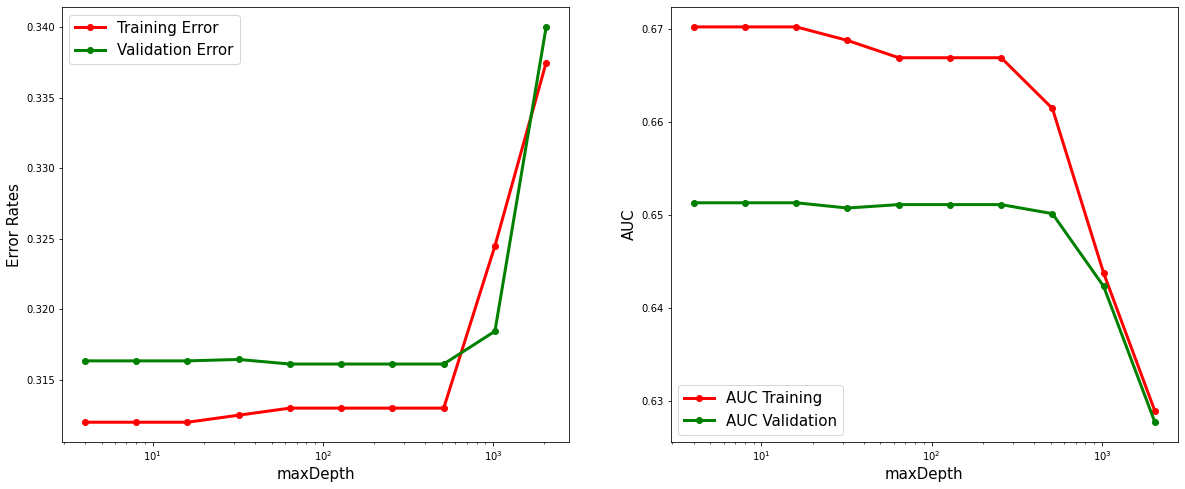

In [109]:
f, ax = plt.subplots(1,2, figsize = (20,8))
ax[0].semilogx(parent, errTrain, color = 'red', lw = 3, marker = 'o', label = 'Training Error')
ax[0].semilogx(parent, errVal, color = 'green', lw = 3, marker = 'o', label = 'Validation Error')
ax[0].set_xlabel('maxDepth', fontsize = 15)
ax[0].set_ylabel('Error Rates', fontsize = 15)
ax[0].legend(fontsize = 15)

ax[1].semilogx(parent, aucTrain, color = 'red', lw = 3, marker = 'o', label = 'AUC Training')
ax[1].semilogx(parent, aucVal, color = 'green', lw = 3, marker = 'o', label = 'AUC Validation')
ax[1].set_xlabel('maxDepth', fontsize = 15)
ax[1].set_ylabel('AUC', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()

In [110]:
print(max(aucVal))

0.6513192827108416


### Heatmap of maxDepth vs minParent

In [131]:
p1 = np.arange(0, 25) # maxDepth
p2 = np.arange(0, 25) # minParent
print(p1.shape)

(25,)


In [132]:
acc = np.zeros([p1.shape[0], p2.shape[0]])
for i in range(p1.shape[0]):
    for j in range(p2.shape[0]):
        learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth = p1[i], minParent = p2[j])
        acc[i][j] = learner.auc(Xva, Yva)
        # here you would do your prediction & scoring
        # store scoring in acc[i][j]

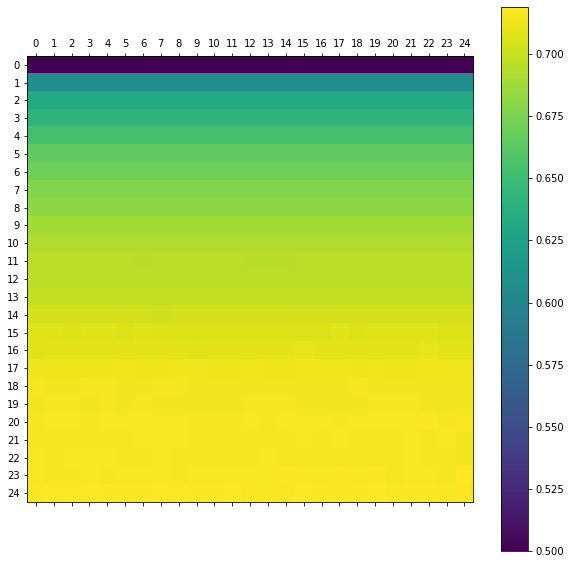

In [134]:
f, ax = plt.subplots(1, 1, figsize = (10,10))

heatmap = ax.matshow(acc)
f.colorbar(heatmap)

ax.set_xticks(p1)
ax.set_xticklabels(['%d' % p for p in p1])

ax.set_yticks(p2)
ax.set_yticklabels(['%d' % p for p in p2])

plt.show()

In [23]:
p1 = np.arange(0, 15) # maxDepth
p2 = np.arange(0, 15) # minParent
print(p1.shape)

(15,)


In [25]:
train_auc = np.zeros([p1.shape[0], p2.shape[0]])
val_auc = np.zeros([p1.shape[0], p2.shape[0]])

for i in range(p1.shape[0]):
    for j in range(p2.shape[0]):
        nFolds = 10
        Jt = np.zeros(nFolds)
        Jv = np.zeros(nFolds)
        
        for iFold in range(nFolds):
            Xti, Xvi, Yti, Yvi = ml.crossValidate(X, Y, nFolds, iFold)
            learner = ml.dtree.treeClassify(Xti, Yti, maxDepth = p1[i], minParent = p2[j])
            
            Jt[iFold] = learner.auc(Xti, Yti)
            Jv[iFold] = learner.auc(Xvi, Yvi)
            
        train_auc[i][j] = np.mean(Jt)
        val_auc[i][j] = np.mean(Jt)
            
        
        # here you would do your prediction & scoring
        # store scoring in acc[i][j]

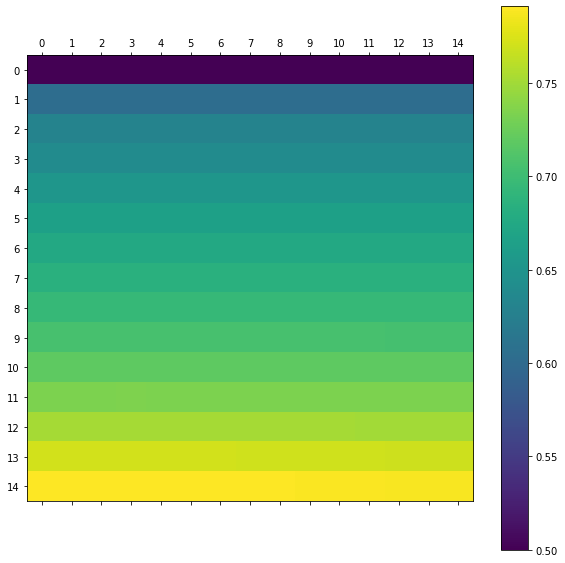

In [26]:
f, ax = plt.subplots(1, 1, figsize = (10,10))

heatmap = ax.matshow(train_auc)
f.colorbar(heatmap)

ax.set_xticks(p1)
ax.set_xticklabels(['%d' % p for p in p1])

ax.set_yticks(p2)
ax.set_yticklabels(['%d' % p for p in p2])

plt.show()

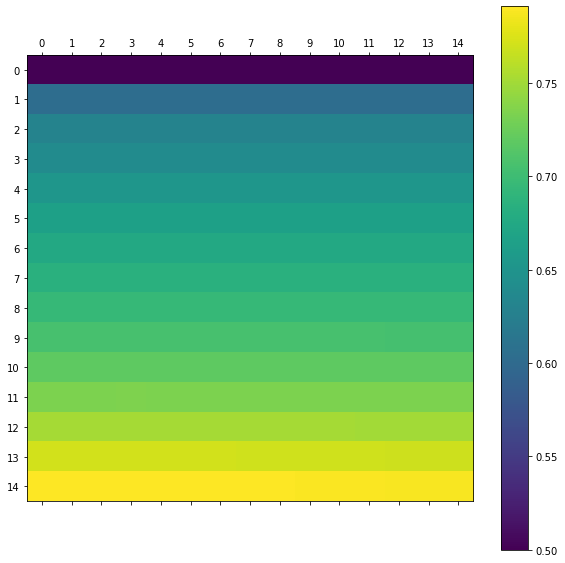

In [27]:
f, ax = plt.subplots(1, 1, figsize = (10,10))

heatmap = ax.matshow(val_auc)
f.colorbar(heatmap)

ax.set_xticks(p1)
ax.set_xticklabels(['%d' % p for p in p1])

ax.set_yticks(p2)
ax.set_yticklabels(['%d' % p for p in p2])

plt.show()